# Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sns.set()

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Загрузка изображений

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


Количество меток и изображений совпадает

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


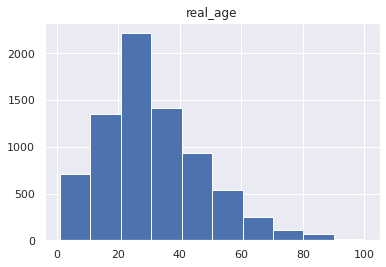

In [7]:
labels.hist();

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


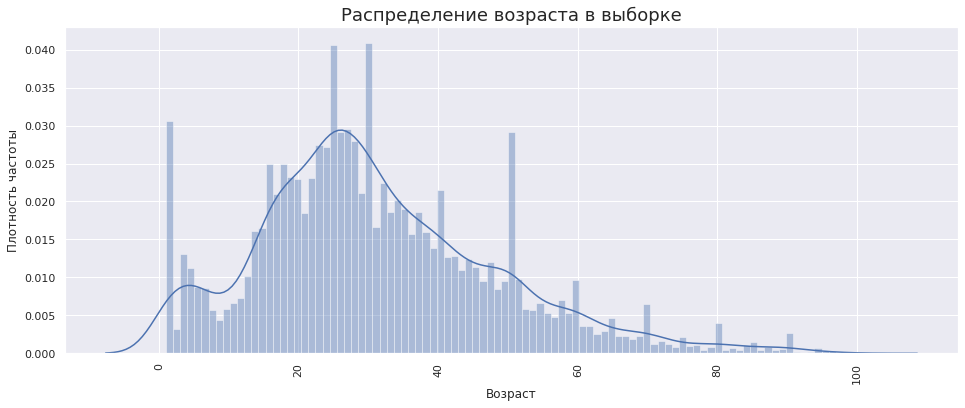

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(labels['real_age'], bins=len(labels['real_age'].unique()))
ax.set_title('Распределение возраста в выборке', fontdict={'fontsize': 18})
plt.xticks(rotation=90)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Плотность частоты', fontsize=12);

Сортировка возрастов по количеству фото в выборке

In [9]:
labels['real_age'].value_counts()

30     317
25     315
27     229
26     226
28     217
      ... 
96       2
93       1
100      1
91       1
97       1
Name: real_age, Length: 97, dtype: int64

Вывод 12 изображений

In [10]:
features, target = next(train_gen_flow)

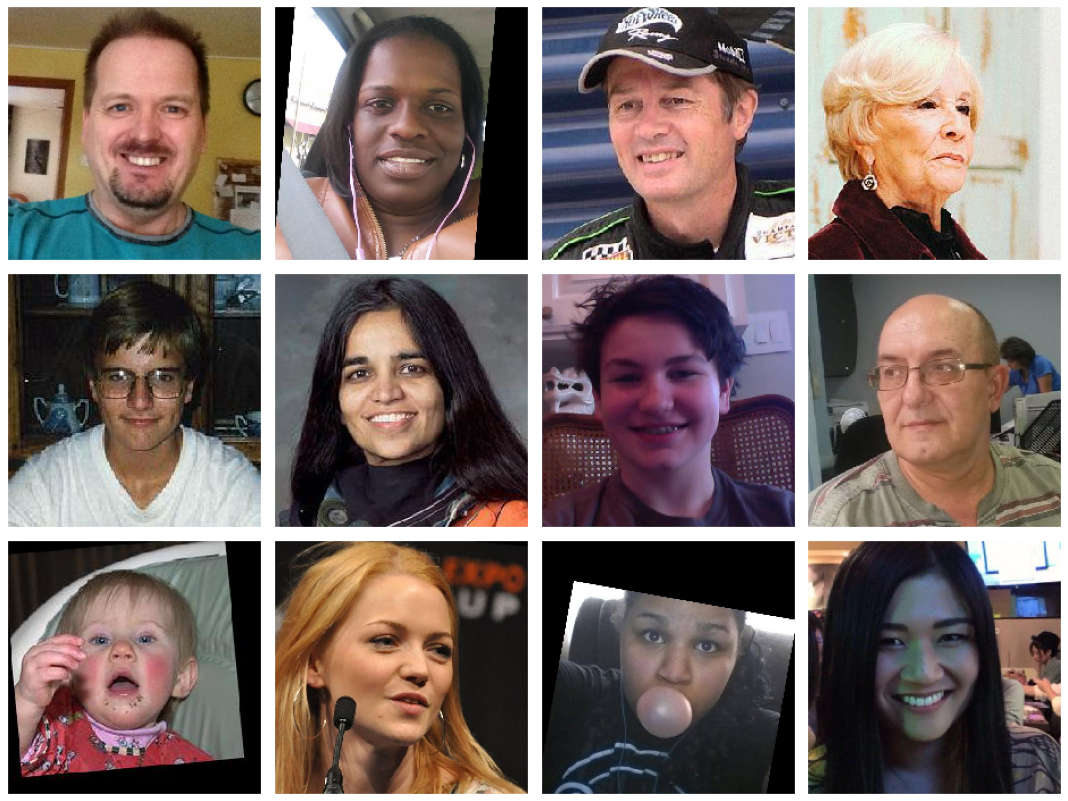

In [11]:
fig = plt.figure(figsize=(15,15))
for i in range(12):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Вывод:

Данные представлены ввиде изображений и меток, каждой фотографии поставлен в соответствие возраст. Количество фотографий и меток совпадает.<br>
Фото сделаны с разных ракурсов, некоторые из которых нехарактерны для магазина. Лишние атрибуты (очки, детские вещи и прочее) не добавят точности. Есть снимки, на которых голова повернута относительно Также фотографии цветные и черно-белые.
Построены графики распределения. Данные распределены неравномерно,  таким образом модель будет обучаться на неравномернораспределенной выборке, вероятно, там где больше фото для года модель лучше обучиться и будет иметь меньший штраф за предсказание, и наоборот, для возраста больше 70 лет больший штраф.